In [11]:
import glob
import librosa
import threading
import numpy as np
import json
import os
import uuid

In [12]:
dataset = json.load(open("./dataset/dataset.json", "r"))

In [13]:
music_data = []

def load_music_file(data):
    vector, sr = librosa.load("./dataset/" + data['file'])
    music_data.append([vector, sr, data['link']])

threads = []
    
for data in dataset:
    t = threading.Thread(target=load_music_file, args=[data,])
    t.start()
    threads.append(t)

for t in threads:
    t.join()

/home/rohit/Documents/python/learn/machine learning/env/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/home/rohit/Documents/python/learn/machine learning/env/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/home/rohit/Documents/python/learn/machine learning/env/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/home/rohit/Documents/python/learn/machine learning/env/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/home/rohit/Documents/python/learn/machine learning/env/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*a

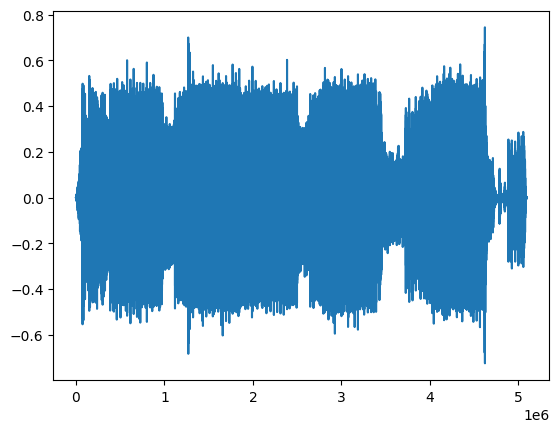

In [14]:
import matplotlib.pyplot as plt

plt.plot(music_data[0][0])

In [23]:
features = []

for y, sr, url in music_data:
    feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=200)
    features.append([np.mean(feature.T, axis=0), url])

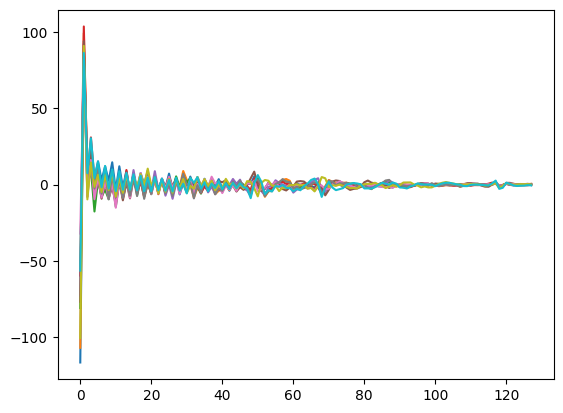

In [24]:
for feature, url in features:
    plt.plot(feature)

In [28]:
for feature in features:
    print(feature[0].size)

128
128
128
128
128
128
128
128
128
128


In [17]:
import redis

In [18]:
redis_client = redis.Redis()

In [19]:
pipeline = redis_client.pipeline()

for feature, url in features:
    pipeline.hmset(
        "music:" + str(uuid.uuid4()),
        {"url": url, "vec": feature.astype(np.float32).tobytes()}
    )

pipeline.execute()

/tmp/ipykernel_89821/1758293991.py:4: DeprecationWarning: Pipeline.hmset() is deprecated. Use Pipeline.hset() instead.
  pipeline.hmset(


[True, True, True, True, True, True, True, True, True, True]